
# DBSCAN

Density Based Spatial Clustering of Applications with Noise

In [21]:
# Agrupamientos
import numpy as np
from sklearn.cluster import DBSCAN

np.random.seed(42)
data = np.random.randn(50000,2) * 20 + 20 # 50,000 puntos
# Detección de anomalías
dbscan = DBSCAN(min_samples=2, eps=3)
clusters = dbscan.fit_predict(data)
list(clusters).count(0)

49769

Las anomalías se marcan con la etiqueta *-1*; para dimensiones altas reduce su eficacia. Estimar el valor de *eps* puede resultar complicado

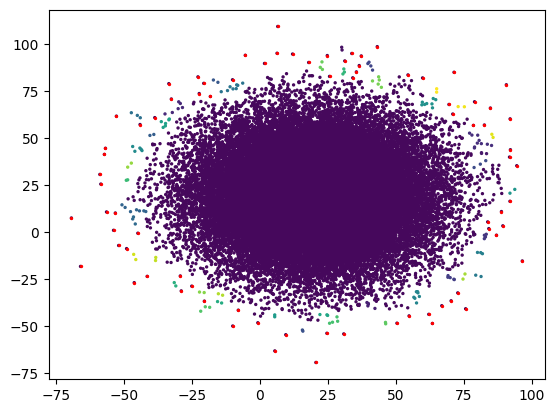

In [33]:
# Visualización
import matplotlib.pyplot as plt
plt.scatter(data[:,0],data[:,1],s=2,c=dbscan.labels_)
plt.scatter(data[dbscan.labels_==-1,0],data[dbscan.labels_==-1,1],s=2,c='red')

La idea de este algoritmo, es tomar un punto y checar un circulo a su alrededor, un radio del tamaño de 'eps' si dentro de el hay otro circulo (min_samples es la suma de vecinos + el mismo), entonces se considera que comparten cluster, esto se repite para todos los puntos uniendolos al cluster de otro si este mismo ya tiene, cuando todos los puntos han sido evaluados, si aun hay puntos sin cluster abre un nuevo cluster y comienza a evaluar, repite hasta que todos los puntos tengan un cluster.

Si existen puntos que no esten conectados a ningun nucleo y que no tengan suficientes vecinos, los consideramos outliers y marcamos con -1.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from collections import Counter

In [ ]:
df = pd.read_csv("../dataSets/winequality.csv")
df.shape, df.head(2)

((6463, 13),
    type1  fixed acidity  volatile acidity  citric acid  residual sugar  \
 0  white            7.0              0.27         0.36            20.7   
 1  white            6.3              0.30         0.34             1.6   
 
    chlorides  free sulfur dioxide  total sulfur dioxide  density   pH  \
 0      0.045                 45.0                 170.0    1.001  3.0   
 1      0.049                 14.0                 132.0    0.994  3.3   
 
    sulphates  alcohol  quality  
 0       0.45      8.8        6  
 1       0.49      9.5        6  )

Usamos solamente *fixed acidity* y *volatile acidity*

In [37]:
data = df.iloc[:,1:3]
data.head(2)

,fixed acidity,volatile acidity
0,7.0,0.27
1,6.3,0.30


In [94]:
# Hiperparámeetros
dbs = DBSCAN(min_samples=10,eps=.125)
dbs.fit(data)

,eps,0.125
,min_samples,10
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [95]:
# Mostrar el total de puntos de cada grupo
print(Counter(dbs.labels_))

Counter({np.int64(0): 6274, np.int64(-1): 116, np.int64(1): 51, np.int64(2): 22})


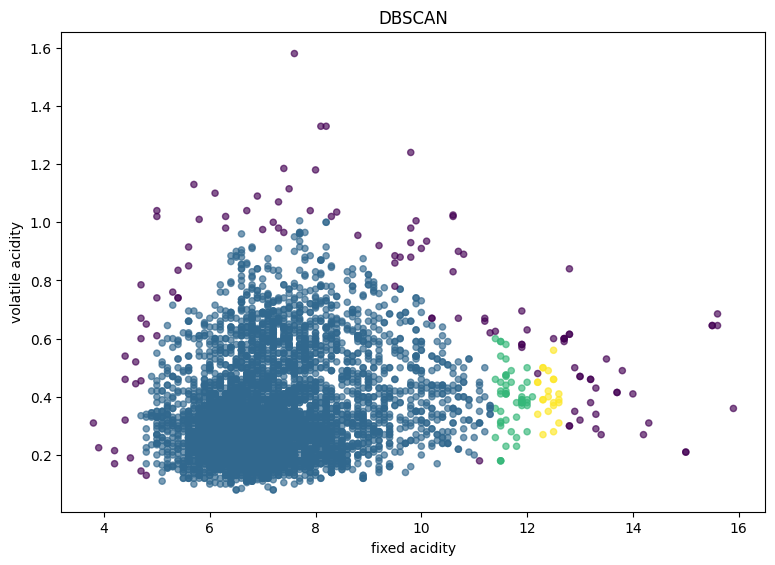

In [112]:
# Visualización
fig = plt.figure()
ax = fig.add_axes([0,0,1.1,1])
ax.scatter(data.iloc[:,0],data.iloc[:,1],c=dbs.labels_,s=20,alpha=.65)
ax.set_xlabel('fixed acidity')
ax.set_ylabel('volatile acidity')
plt.title('DBSCAN')
plt.show()